In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/sevadaaghasyan/Downloads/weather-check.csv')

In [3]:
df = df.rename(columns = {'Do you typically check a daily weather report?':'Question 1',
                              'How do you typically check the weather?':'Question 2',
                              'A specific website or app (please provide the answer)':'Question 3',
                              'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'Question 4',
                              'Age':'Question 5',
                              'What is your gender?':'Question 6',
                              'How much total combined money did all members of your HOUSEHOLD earn last year?':'Question 7'})

In [4]:
df['US Region'] = df['US Region'].replace(['-'],'Prefer not to answer')
df['Question 4'] = df['Question 4'].replace(['-'],'Prefer not to answer')

In [5]:
data = df.groupby('US Region')[['Question 4']].value_counts(normalize=True).unstack().fillna(0) * 100

In [6]:
data

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.000000,26.950355,7.092199,44.680851,21.276596
East South Central,0.000000,26.829268,14.634146,39.024390,19.512195
Middle Atlantic,0.000000,22.115385,7.692308,43.269231,26.923077
Mountain,0.000000,26.388889,9.722222,38.888889,25.000000
New England,0.000000,30.769231,7.692308,42.307692,19.230769
Pacific,0.000000,36.216216,9.729730,29.729730,24.324324
Prefer not to answer,35.483871,22.580645,6.451613,12.903226,22.580645
South Atlantic,0.000000,30.519481,5.194805,48.051948,16.233766
West North Central,0.000000,38.888889,5.555556,33.333333,22.222222


In [7]:
data_1 = df.groupby('US Region')[['Question 4']].value_counts().unstack().fillna(0) 

In [8]:
data_1

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.0,38.0,10.0,63.0,30.0
East South Central,0.0,11.0,6.0,16.0,8.0
Middle Atlantic,0.0,23.0,8.0,45.0,28.0
Mountain,0.0,19.0,7.0,28.0,18.0
New England,0.0,16.0,4.0,22.0,10.0
Pacific,0.0,67.0,18.0,55.0,45.0
Prefer not to answer,11.0,7.0,2.0,4.0,7.0
South Atlantic,0.0,47.0,8.0,74.0,25.0
West North Central,0.0,21.0,3.0,18.0,12.0


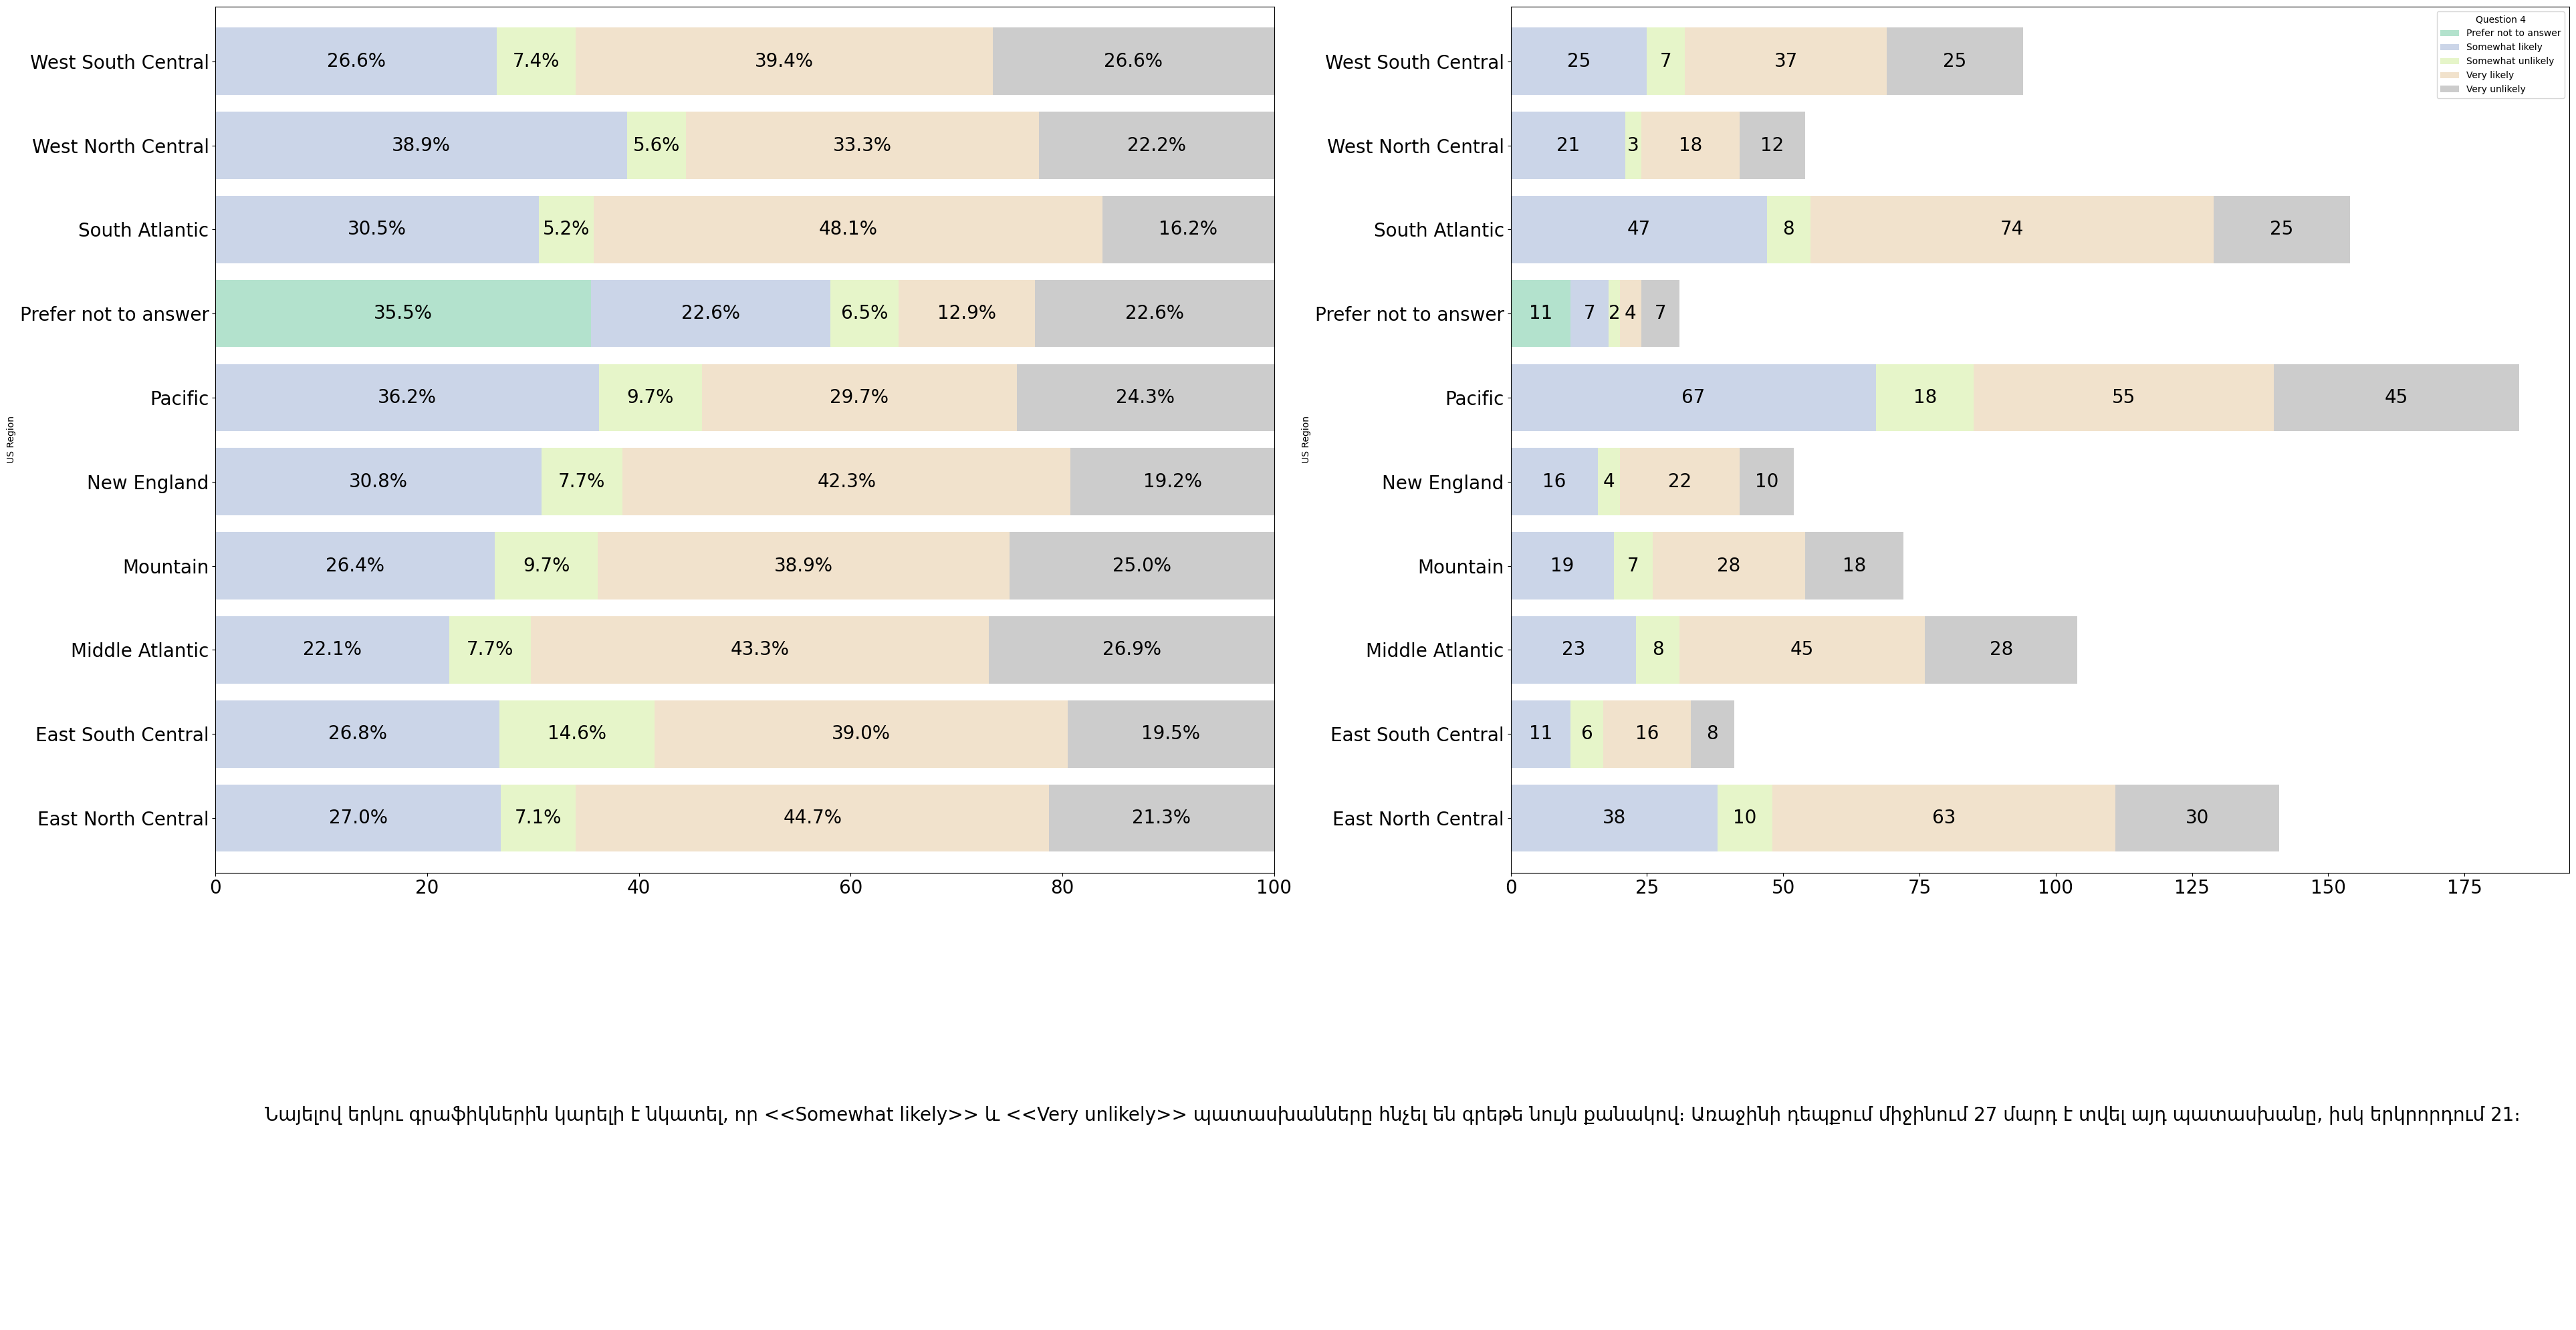

In [9]:
# Create a figure and axis for the subplots
fig = plt.figure(figsize=(40, 20))

# Add the first subplot for the first set of data
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
data.plot(ax=ax1, stacked=True, kind='barh', colormap="Pastel2", width=0.8, fontsize=20, xlim=[0,100], legend=False)
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{width:.1f}' + "%" if width > 0 else ''
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)
    

# Add the second subplot for the second set of data
ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2)
data_1.plot(ax=ax2, stacked=True, kind='barh', colormap="Pastel2", width=0.8, fontsize=20)
for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{width:.0f}' if width > 0 else ''
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)


# Add the third subplot for text
text = 'Նայելով երկու գրաֆիկներին կարելի է նկատել, որ <<Somewhat likely>> և <<Very unlikely>> պատասխանները հնչել են գրեթե նույն քանակով։ Առաջինի դեպքում միջինում 27 մարդ է տվել այդ պատասխանը, իսկ երկրորդում 21։'
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
ax3.axis('off')  # Turn off axis
ax3.text(0.5, 0.5, text, ha='center', va='center', fontsize=20)

# Adjust layout
plt.tight_layout()

plt.show()